In [116]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import sqlite3
import matplotlib.pyplot as plt

%config Completer.use_jedi = False #for auto complete cod

In [117]:
class solidLR:
    def __init__(self,x,y):
        self.x=x
        self.y=y
        #variables que almacenan la normalizacion
        self.xn=0
        #modelo
        self.model=0
        pass
    def modelo_linear(self):
        self.xn=StandardScaler().fit_transform(self.x)
        self.xn=sm.add_constant(self.xn)
        self.model = sm.OLS(self.y,self.xn)
        self.model = self.model.fit()
    def significancia(self):
        return self.model.summary(xname=['constante']+list(self.x.columns))
    def plotXvsY(self):
        fig, axs = plt.subplots(4,4, figsize=(20, 15), facecolor='w', edgecolor='k')
        fig.subplots_adjust(hspace = .5, wspace=.10)

        axs = axs.ravel()
        for i,column in enumerate(self.x.columns):
            axs[i].scatter(self.x[column],self.y)
            axs[i].set_title(f'{column} vs GPC')
        
        plt.show()
        

# Testing other data bases

In [118]:
conn = sqlite3.connect('../data/solid_waste.db')

In [119]:
statistics = ['promedio','media']
grupo = ['departamental','distrital']

Model promedio_departamental
                            OLS Regression Results                            
Dep. Variable:                    GPC   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     1.484
Date:                Sun, 05 Jun 2022   Prob (F-statistic):              0.292
Time:                        11:02:26   Log-Likelihood:                 51.586
No. Observations:                  25   AIC:                            -69.17
Df Residuals:                       8   BIC:                            -48.45
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constante    

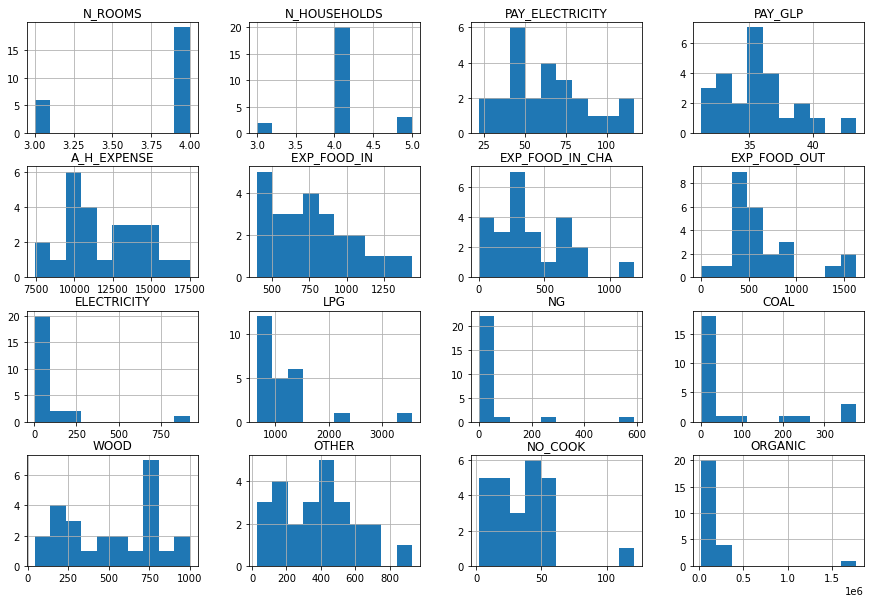

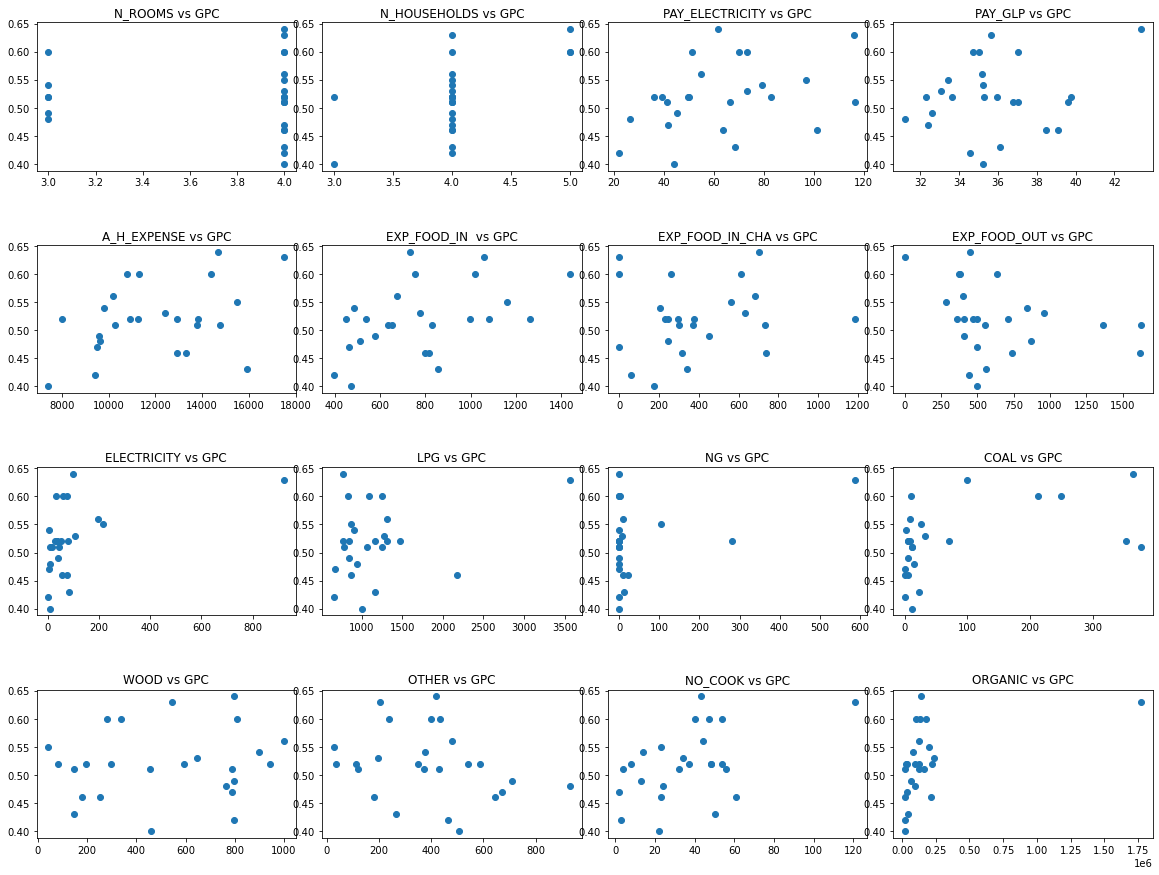

Model promedio_distrital
                            OLS Regression Results                            
Dep. Variable:                    GPC   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.046
Date:                Sun, 05 Jun 2022   Prob (F-statistic):              0.459
Time:                        11:02:29   Log-Likelihood:                -21.373
No. Observations:                  35   AIC:                             76.75
Df Residuals:                      18   BIC:                             103.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constante        

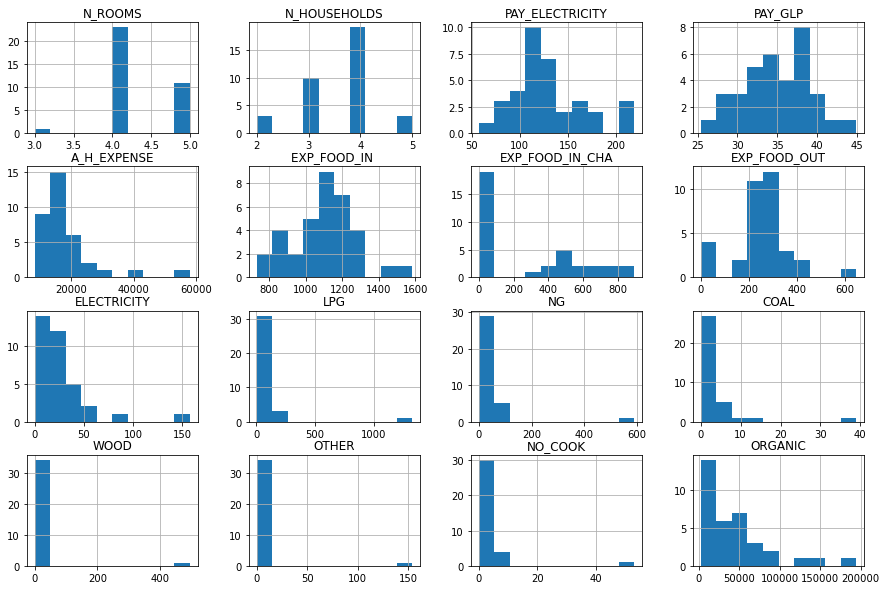

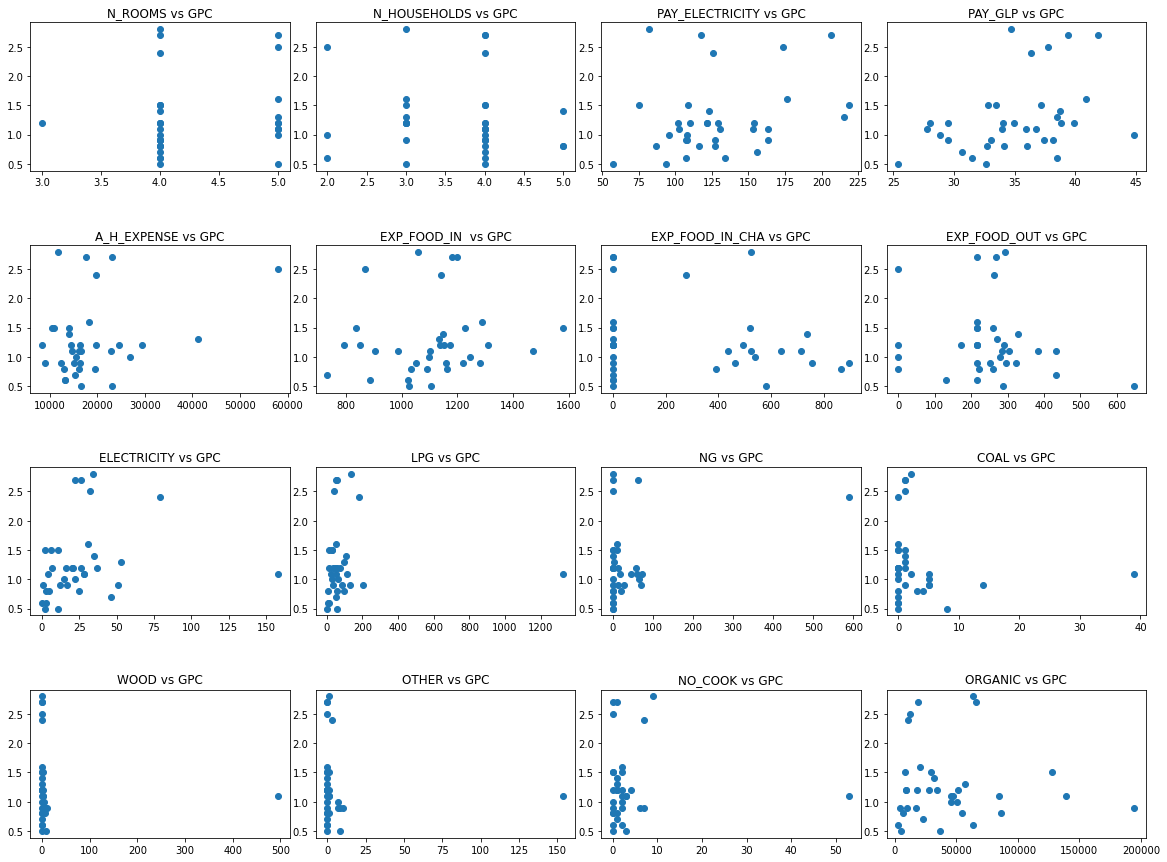

Model media_departamental
                            OLS Regression Results                            
Dep. Variable:                    GPC   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     1.171
Date:                Sun, 05 Jun 2022   Prob (F-statistic):              0.428
Time:                        11:02:31   Log-Likelihood:                 49.439
No. Observations:                  25   AIC:                            -64.88
Df Residuals:                       8   BIC:                            -44.16
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constante       

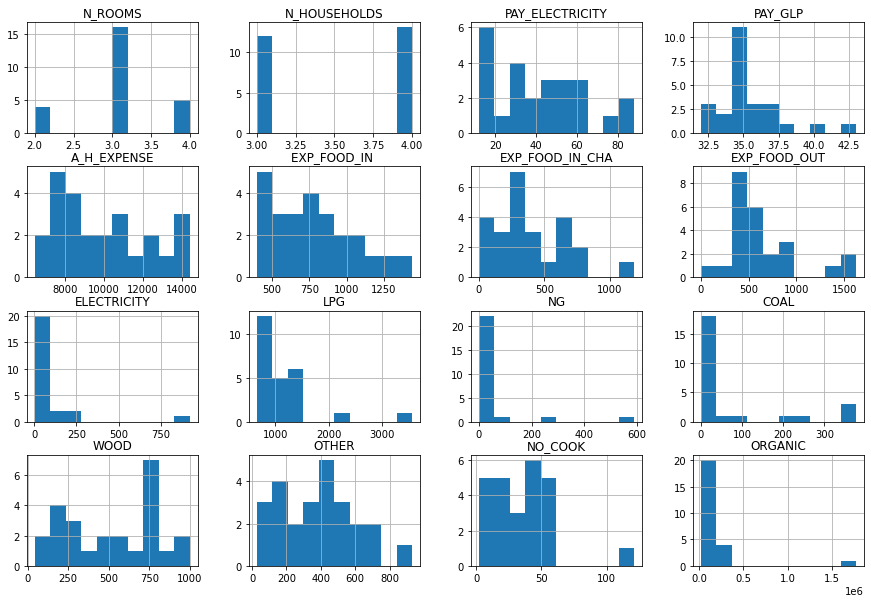

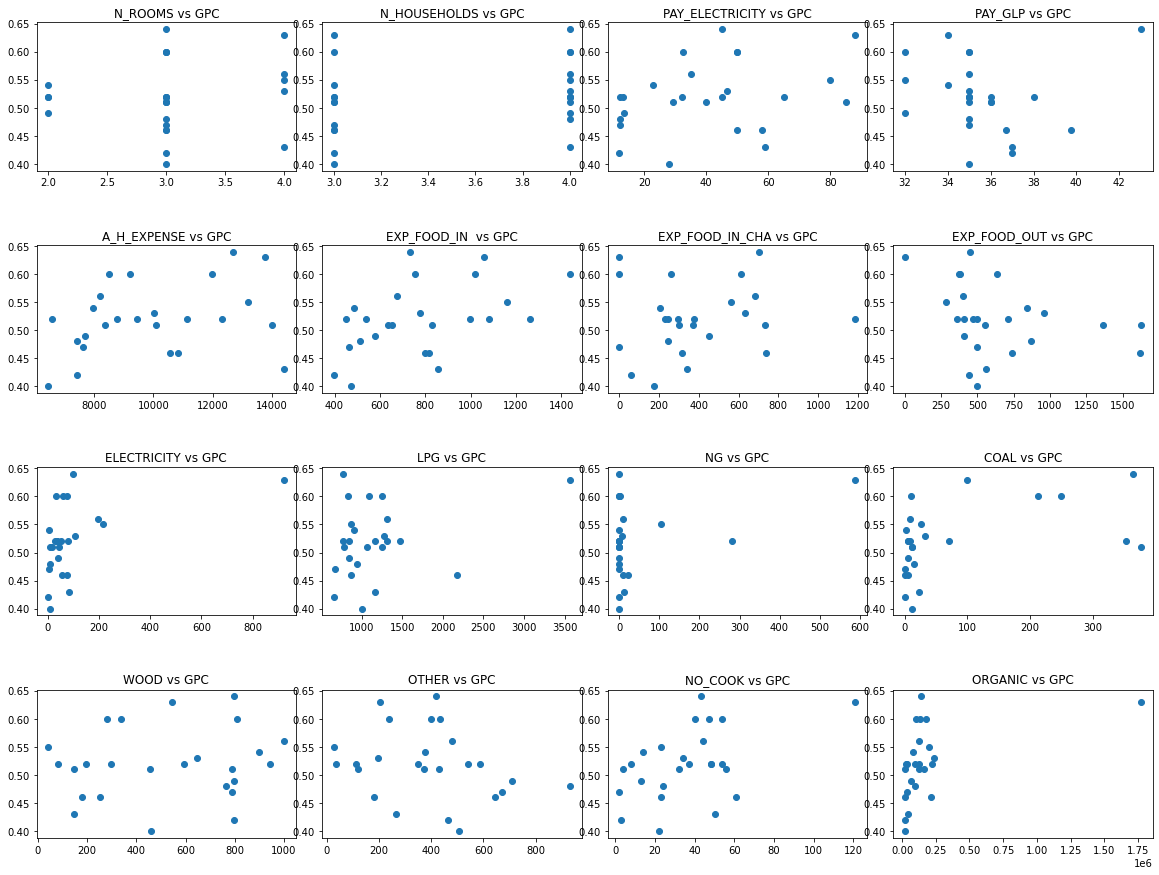

Model media_distrital
                            OLS Regression Results                            
Dep. Variable:                    GPC   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     1.353
Date:                Sun, 05 Jun 2022   Prob (F-statistic):              0.266
Time:                        11:02:33   Log-Likelihood:                -19.059
No. Observations:                  35   AIC:                             72.12
Df Residuals:                      18   BIC:                             98.56
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constante           

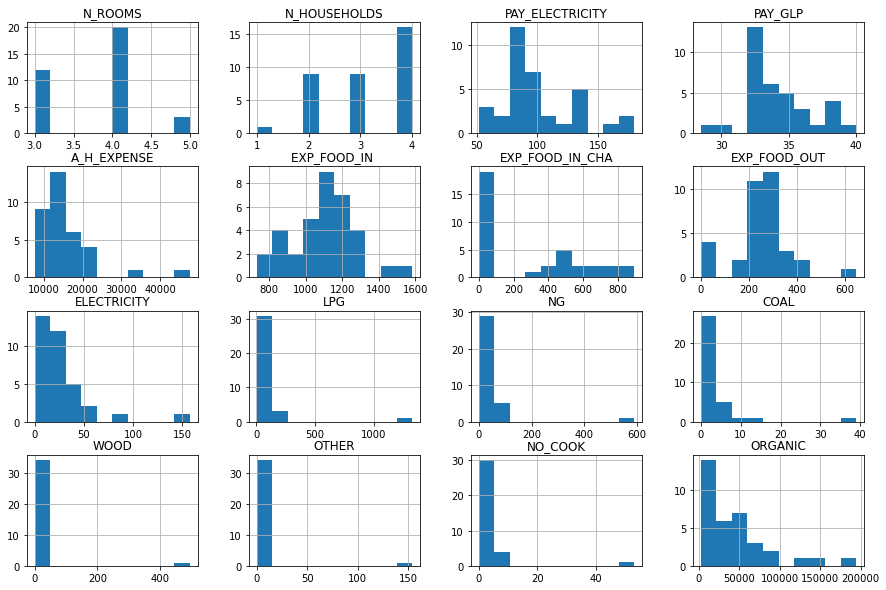

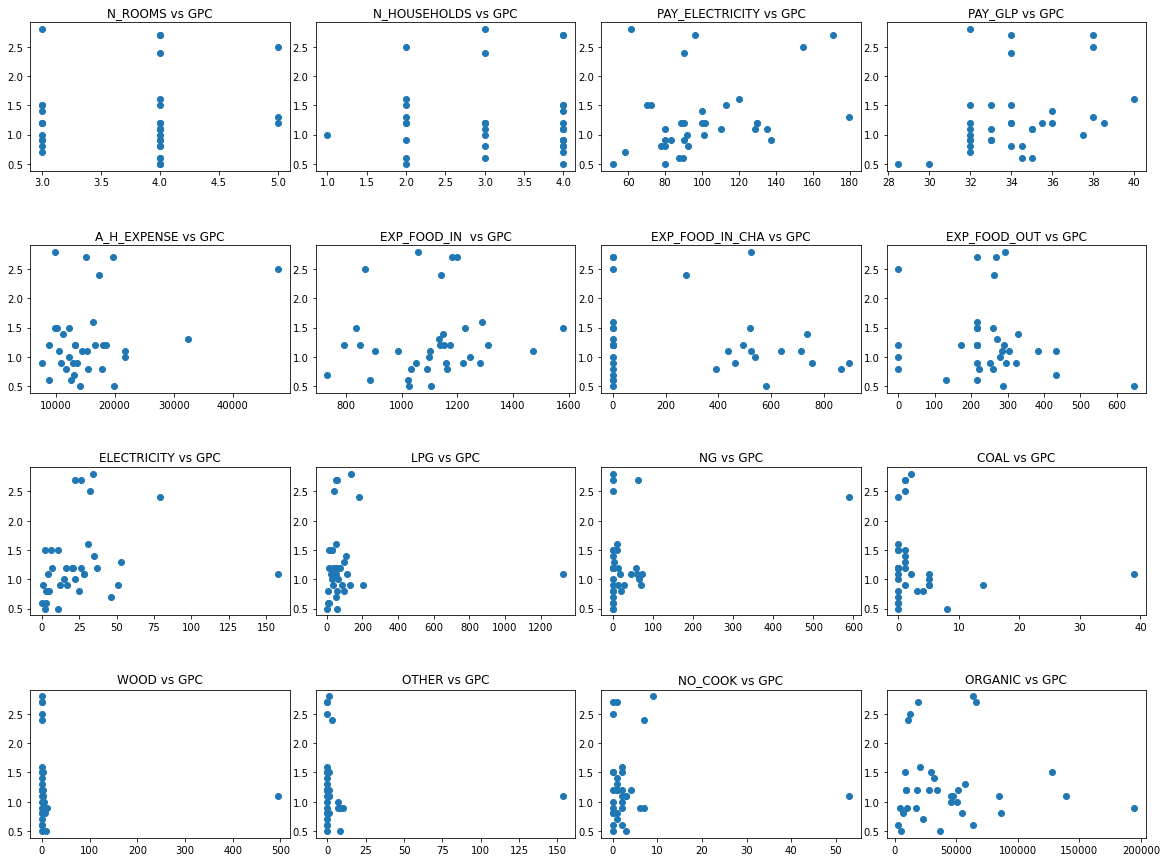

In [120]:
for stat in statistics:
    for group in grupo:
        sql_statement ="SELECT * FROM " + stat + '_' + group
        df = pd.read_sql_query(sql_statement, conn)
        df=df.select_dtypes(exclude=['object'])
        X = df.drop(columns=['GPC'])
        y = df['GPC']
        est = solidLR(X,y)
        est.modelo_linear()
        print ('Model '+ stat + '_' + group)
        print(est.significancia())
        X.hist(figsize=(15,10))
        plt.show()
        est.plotXvsY()
        
        